<a id=top-page></a>
# Generate images for Fig. 2

***

In [1]:
import numpy as np
import pandas as pd
import cmcrameri.cm as cmc
import matplotlib.pyplot as plt
from pykitPIV import Particle, FlowField, Motion, Image, Postprocess

2025-04-15 13:04:25.322140: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
n_images = 1
image_size = (100,100)
size_buffer = 0
figsize = (6,6)
cmap = cmc.oslo_r

***

## Generate various flow fields

[Go to the top](#top-page)

In [3]:
image = Image(random_seed=100)

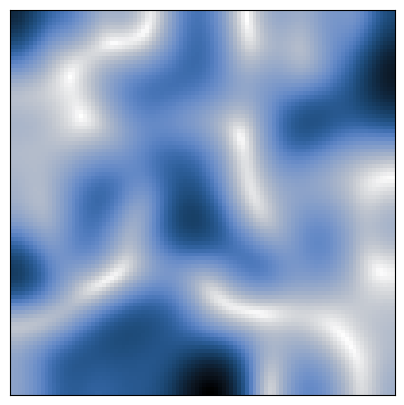

In [4]:
flowfield = FlowField(n_images,
                      size=image_size,
                      size_buffer=size_buffer,
                      random_seed=100)

flowfield.generate_random_velocity_field(gaussian_filters=(2,5),
                                         n_gaussian_filter_iter=10,
                                         displacement=(10,10))

image.add_flowfield(flowfield)

image.plot_field_magnitude(0,
                           with_buffer=False,
                           xticks=False,
                           yticks=False,
                           cmap=cmap,
                           cbar=False,
                           figsize=(5,5),
                           filename='random-smooth.png');

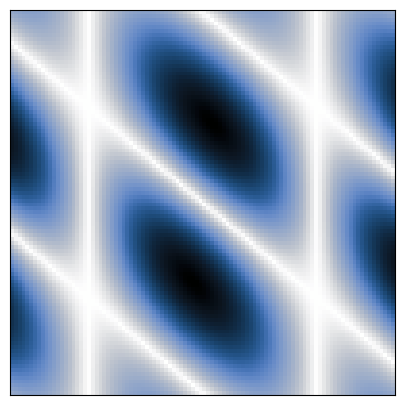

In [9]:
flowfield = FlowField(n_images,
                      size=image_size,
                      size_buffer=size_buffer,
                      random_seed=100)

flowfield.generate_spherical_harmonics_velocity_field(displacement=(0,10), order=10, degree=10)

image.add_flowfield(flowfield)

image.plot_field_magnitude(0,
                           with_buffer=False,
                           xticks=False,
                           yticks=False,
                           # add_quiver=True,
                           # quiver_color='r',
                           cmap=cmap,
                           cbar=False,
                           figsize=(5,5),
                           filename='spherical-harmonics.png');

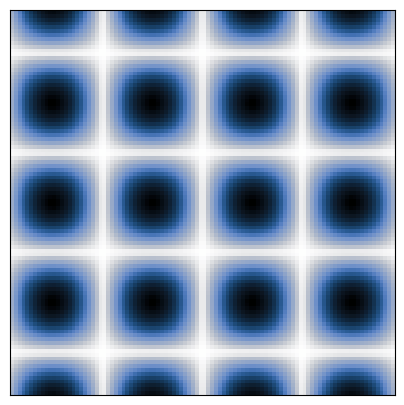

In [17]:
flowfield = FlowField(n_images,
                      size=image_size,
                      size_buffer=size_buffer,
                      random_seed=100)

flowfield.generate_checkered_velocity_field(displacement=(0,10), m=6, n=6)

image.add_flowfield(flowfield)

image.plot_field_magnitude(0,
                           with_buffer=False,
                           xticks=False,
                           yticks=False,
                           # add_quiver=True,
                           # quiver_step=3,
                           # quiver_color='r',
                           cmap=cmap,
                           cbar=False,
                           figsize=(5,5),
                           filename='checkered.png');

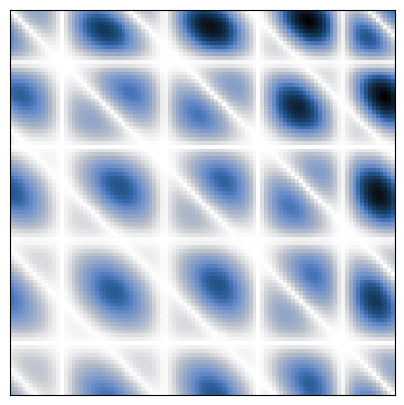

In [24]:
flowfield = FlowField(n_images,
                      size=image_size,
                      size_buffer=size_buffer,
                      random_seed=100)

flowfield.generate_chebyshev_velocity_field(displacement=(10,10), order=20)

image.add_flowfield(flowfield)

image.plot_field_magnitude(0,
                           with_buffer=False,
                           xticks=False,
                           yticks=False,
                           cmap=cmap,
                           cbar=False,
                           figsize=(5,5),
                           filename='chebyshev.png');

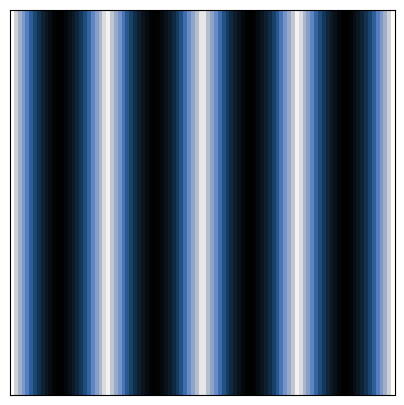

In [27]:
flowfield = FlowField(n_images,
                      size=image_size,
                      size_buffer=size_buffer,
                      random_seed=100)

flowfield.generate_sinusoidal_velocity_field(amplitudes=(2,2), 
                                             wavelengths=(50,50),
                                             components='u')

image.add_flowfield(flowfield)

image.plot_field_magnitude(0,
                           with_buffer=False,
                           xticks=False,
                           yticks=False,
                           cmap=cmap,
                           cbar=False,
                           figsize=(5,5),
                           filename='sinusoidal.png');

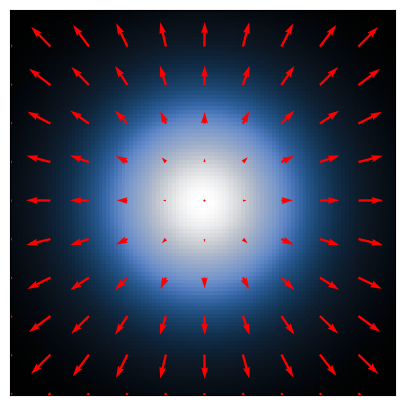

In [32]:
flowfield = FlowField(n_images,
                      size=image_size,
                      size_buffer=size_buffer,
                      random_seed=100)

flowfield.generate_radial_velocity_field(source=True,
                                         displacement=(10,10), 
                                         imposed_source_location=(50,50))

image.add_flowfield(flowfield)

image.plot_field_magnitude(0,
                           with_buffer=False,
                           xticks=False,
                           yticks=False,
                           add_quiver=True,
                           quiver_step=10,
                           quiver_color='r',
                           cmap=cmc.oslo_r,
                           cbar=False,
                           figsize=(5,5),
                           filename='radial.png');

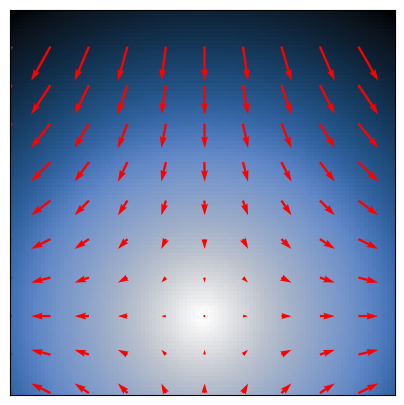

In [36]:
flowfield = FlowField(n_images,
                      size=image_size,
                      size_buffer=size_buffer,
                      random_seed=100)

flowfield.generate_potential_velocity_field(imposed_origin=(20,50))

image.add_flowfield(flowfield)

image.plot_field_magnitude(0,
                           with_buffer=False,
                           xticks=False,
                           yticks=False,
                           add_quiver=True,
                           quiver_step=10,
                           quiver_color='r',
                           cmap=cmc.oslo_r,
                           cbar=False,
                           figsize=(5,5),
                           filename='potential.png');

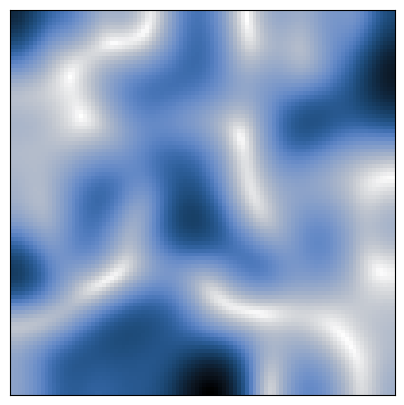

In [37]:
mean_flowfield = FlowField(n_images,
                      size=image_size,
                      size_buffer=size_buffer,
                      random_seed=100)

mean_flowfield.generate_random_velocity_field(gaussian_filters=(2,5),
                                         n_gaussian_filter_iter=10,
                                         displacement=(10,10))


image.add_flowfield(mean_flowfield)

image.plot_field_magnitude(0,
                           with_buffer=False,
                           xticks=False,
                           yticks=False,
                           cmap=cmap,
                           cbar=False,
                           figsize=(5,5),
                           filename='random-smooth.png');

Generating velocity field for image 0...
	Averaging time: 0.4 minutes.

Total time: 0.6 minutes.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


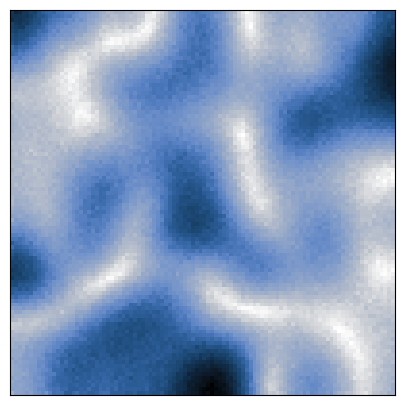

In [38]:
flowfield = FlowField(n_images,
                      size=image_size,
                      size_buffer=size_buffer,
                      random_seed=100)

flowfield.generate_langevin_velocity_field(mean_field=mean_flowfield.velocity_field,
                                           integral_time_scale=0.1,
                                           sigma=1,
                                           n_stochastic_particles=1000000,
                                           n_iterations=100,
                                           verbose=True)

image.add_flowfield(flowfield)

image.plot_field_magnitude(0,
                           with_buffer=False,
                           xticks=False,
                           yticks=False,
                           # add_quiver=True,
                           # quiver_color='r',
                           cmap=cmc.oslo_r,
                           cbar=False,
                           figsize=(5,5),
                           filename='langevin.png');

In [ ]:
grid_size = 128
n_modes = 100

In [ ]:
flowfield = FlowField(n_images,
                      size=(grid_size,grid_size),
                      size_buffer=0)

In [ ]:
u_df = pd.read_csv('../../docs/data/u_n' + str(grid_size) + '_m' + str(n_modes) + '.txt', sep = ',', header=1).to_numpy()
v_df = pd.read_csv('../../docs/data/v_n' + str(grid_size) + '_m' + str(n_modes) + '.txt', sep = ',', header=1).to_numpy()
w_df = pd.read_csv('../../docs/data/w_n' + str(grid_size) + '_m' + str(n_modes) + '.txt', sep = ',', header=1).to_numpy()

u_tensor = np.reshape(u_df, (grid_size,grid_size,grid_size))
v_tensor = np.reshape(v_df, (grid_size,grid_size,grid_size))
w_tensor = np.reshape(w_df, (grid_size,grid_size,grid_size))

In [ ]:
synth_turb_gen_velocity_field = (u_tensor[0:2,None,:,:], v_tensor[0:2,None,:,:])

In [ ]:
u_tensor.shape

In [ ]:
synth_turb_gen_velocity_field = image.concatenate_tensors(synth_turb_gen_velocity_field)

In [ ]:
synth_turb_gen_velocity_field.shape

In [ ]:
flowfield.upload_velocity_field(synth_turb_gen_velocity_field)

In [ ]:
image.add_flowfield(flowfield)

In [ ]:
image.plot_field_magnitude(0,
                                    with_buffer=False,
                                    xticks=False,
                                    yticks=False,
                                    cmap=cmc.oslo_r,
                                    cbar=False,
                                    figsize=(5,5),
                                    filename='synthetic-turbulence.png');

***